<a href="https://colab.research.google.com/github/mbr-ctrl/customer_satisfaction_analysis/blob/main/satifaction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/E-commerce_NPA_Dataset.csv', index_col='CustomerID')
df = data.copy()

In [14]:
df.head()

,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember,age_group,NPS_CustomerService
CustomerID,,,,,,,,,,,,,
1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No,30-39,Detractors
2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes,30-39,Detractors
3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes,50-59,Detractors
4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes,30-39,Detractors
5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No,50-59,Detractors


# Interpretation des variables
- **CustomerID**: Identifiant unique pour chaque client.
**Age**: Âge du client.
**Gender**: Sexe du client (Homme/Femme).
**PurchaseAmount**: Montant total dépensé par le client.
**PurchaseFrequency**: Nombre d'achats effectués par le client.
**ProductQualityRating**: Évaluation du client pour la qualité du produit (1-5).
**DeliveryTimeRating**: Évaluation du client pour le délai de livraison (1-5).
**CustomerServiceRating**: Évaluation du client pour le service client (1-5).
**WebsiteEaseOfUseRating**: Évaluation du client pour la facilité d'utilisation du site web (1-5).
**ReturnRate**: Proportion des produits retournés par le client.
**DiscountUsage**: Montant de la réduction utilisée par le client.
**LoyaltyProgramMember**: Si le client est membre du programme de fidélité (Oui/Non).

# Interpretation des variables
### Lignes et colonnes:
La base de données comporte 500 lignes et 11 colonnes.
### Sommaire:
**Age:** L'âge moyen des clients est d'environ 44 ans, avec un âge minimum de 18 ans et un âge maximum de 69 ans.
**Customer_Rating:** La note moyenne attribuée par les clients est d'environ 2,93, avec une note maximale de 5. Cela suggère que la satisfaction client est plutôt modérée.



In [8]:
df.shape

(500, 11)

In [9]:
df.describe()

,Age,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,44.170000,1065.050731,14.308000,2.93400,3.008000,3.0780,3.082000,0.252280,251.181010
std,14.813777,583.199658,8.151197,1.41054,1.372481,1.4156,1.415374,0.149674,141.531993
min,18.000000,51.799790,1.000000,1.00000,1.000000,1.0000,1.000000,0.000000,0.772696
25%,32.000000,535.083407,7.000000,2.00000,2.000000,2.0000,2.000000,0.110000,133.672231
50%,44.000000,1100.884065,14.000000,3.00000,3.000000,3.0000,3.000000,0.260000,251.940355
75%,58.000000,1584.348124,22.000000,4.00000,4.000000,4.0000,4.000000,0.380000,371.692341
max,69.000000,1999.655968,29.000000,5.00000,5.000000,5.0000,5.000000,0.500000,499.813315


In [10]:
df.dtypes

,0
Age,int64
Gender,object
PurchaseAmount,float64
PurchaseFrequency,int64
ProductQualityRating,int64
DeliveryTimeRating,int64
CustomerServiceRating,int64
WebsiteEaseOfUseRating,int64
ReturnRate,float64
DiscountUsage,float64


In [11]:
numeric_col = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_col)

['Age', 'PurchaseAmount', 'PurchaseFrequency', 'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage']


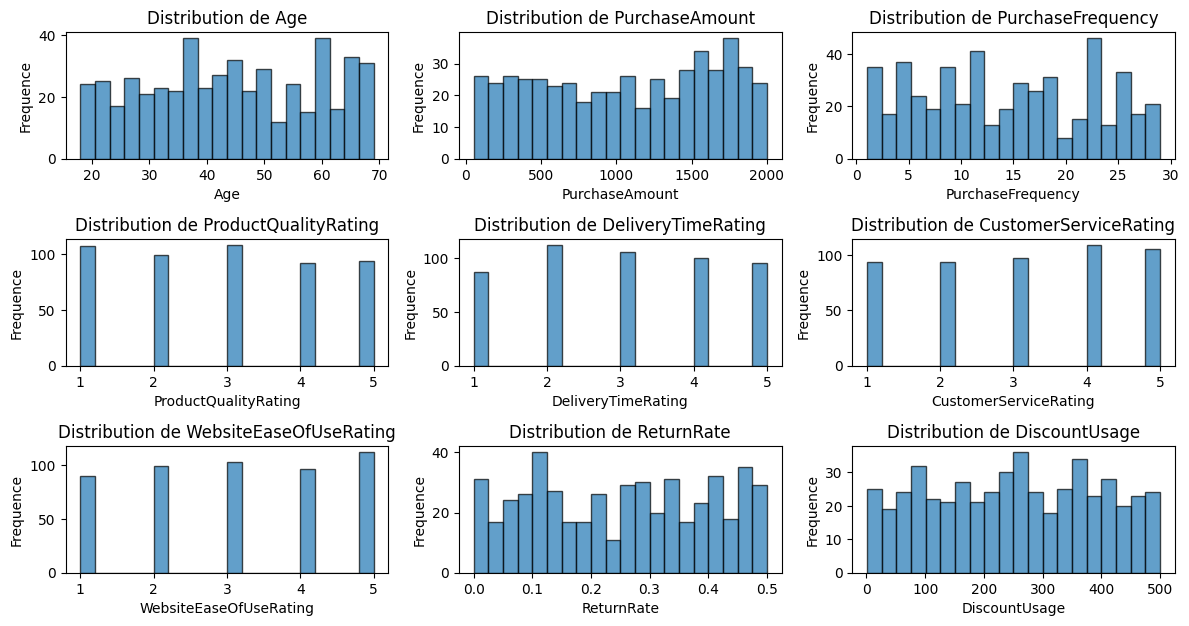

In [14]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(4, 3, i)
    plt.hist(df[col], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequence')
plt.tight_layout()
plt.show()

**Age**

On observe plus de clients jeunes de la tranche d'âge 30-40 ans et des clients de la tranche d'age 60-70. On observe un pic autour .
La stratégie marketing de la plateforme e-commerce pourrait être davantage axée sur les jeunes.

**ProductQualityRating**

La distribution des notes clients semble relativement uniforme, avec un léger pic autour de 3. Cela pourrait indiquer que la satisfaction client est globalement modérée, avec une répartition assez égale entre les différents niveaux de notation.
Il pourrait y avoir des pistes d'amélioration au niveau du service client ou de la qualité des produits pour augmenter les notes.
Les clients pourraient être hésitants à donner des notes extrêmes (très élevées ou très basses).

**DeliveryTimeRating (Évaluation du délai de livraison)**

Semblable à ProductQualityRating, cette distribution est globalement uniforme, avec un pic autour de 2. Cela indique une mauvaise satisfaction concernant les délais de livraison.
Hypothèses :
L'optimisation des processus de livraison et la fourniture d'estimations de livraison plus précises pourraient améliorer la satisfaction client et les évaluations.
L'analyse des délais de livraison pour différentes régions ou catégories de produits pourrait permettre d'identifier les goulots d'étranglement potentiels.

In [4]:
def category_ages(age):
  if age <= 29:
    return '18-29'
  elif (age > 29) & (age <= 39):
    return '30-39'
  elif (age > 39) & (age <= 49):
    return '40-49'
  elif (age > 49) & (age <= 59):
    return '50-59'
  elif (age > 59) & (age <= 69):
    return '60-69'

In [5]:
df['age_group'] = df['Age'].map(category_ages)
df

,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember,age_group
CustomerID,,,,,,,,,,,,
1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No,30-39
2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes,30-39
3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes,50-59
4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes,30-39
5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...
496,25,Female,1331.673244,2,1,4,5,5,0.20,483.526690,No,18-29
497,53,Male,1031.814050,2,3,3,1,3,0.13,372.031011,Yes,50-59
498,42,Female,1554.718256,26,5,1,2,3,0.11,373.020405,No,40-49


In [6]:
# Selctionner uniquement quelques colonnes numeriques
numeric_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']

# calculer Les notations moyennes par age et genre
mean_ratings_age_gender = df.groupby(['age_group', 'Gender'])[numeric_columns].mean()
mean_ratings_age_gender

ProductQualityRating  DeliveryTimeRating  \
age_group Gender                                             
18-29     Female              3.052632            3.210526   
          Male                2.933333            3.000000   
30-39     Female              2.929825            2.859649   
          Male                3.080000            2.820000   
40-49     Female              3.090909            2.890909   
          Male                2.857143            3.166667   
50-59     Female              2.945946            2.945946   
          Male                2.833333            2.895833   
60-69     Female              2.900000            3.300000   
          Male                2.673469            2.938776   

                  CustomerServiceRating  WebsiteEaseOfUseRating  
age_group Gender                                                 
18-29     Female               3.175439                2.912281  
          Male                 3.333333                3.355556  
30-39     Female               2.912281                3.070175  
          Male                 2.980000                2.880000  
40-49     Female               3.036364                3.109091  
          Male                 3.142857                3.142857  
50-59     Female               3.027027                3.162162  
          Male                 3.312500                3.062500  
60-69     Female               3.066667                2.950000  
          Male                 2.836735                3.285714

Les clients plus jeunes (18-29 ans) notent généralement la qualité du produit légèrement plus haut. Les femmes de la tranche d'âge 40-49 donnent les notes les plus élevées, tandis que les hommes de la tranche d'âge 60-69 donnent les notes les plus basses. La satisfaction concernant les délais de livraison est relativement constante entre les groupes d'âge, avec de légères variations. Les notes les plus élevées pour la satisfaction concernant les délais de livraison proviennent des femmes âgées de 60 à 69 ans, tandis que les plus basses proviennent des hommes âgés de 30 à 39 ans. Les notes concernant le service client sont assez constantes, avec un léger pic chez les hommes plus jeunes (18-29 ans). Les hommes de la tranche d'âge 60-69 donnent les notes les plus basses concernant le service client.

In [7]:
# Analysons l'impact de l'adhésion au programme de fidélité sur la satisfaction client
mean_ratings_loyalty_program = df.groupby('LoyaltyProgramMember')[numeric_columns].mean()
mean_ratings_loyalty_program

,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating
LoyaltyProgramMember,,,,
No,2.920502,2.916318,2.987448,3.108787
Yes,2.946360,3.091954,3.160920,3.057471


- **ProductQualityRating** : les membres du programme de fidélité notent la qualité du produit légèrement plus élevée (2,95) que les non-membres (2,92).
- **DeliveryTimeRating**: les membres du programme de fidélité sont plus satisfaits du délai de livraison (3,09) que les non-membres (2,92).
- **CustomerServiceRating**: les membres notent le service client plus élevé (3,16) que les non-membres (2,99).
- **WebsiteEaseOfUseRating **: les non-membres notent le site Web légèrement plus élevé (3,11) que les membres (3,06).

## Le Net Promoter Score
Le NPS est une métrique utilisée pour évaluer la fidélité et la satisfaction des clients en demandant aux clients dans quelle mesure ils sont susceptibles de recommander le produit ou le service d'une entreprise à d'autres sur une échelle de 0 à 10. Les répondants sont classés en trois catégories :
- Promoters (9-10) --> Promoteurs (9-10)
- Passives (7-8) --> Passifs (7-8)
- Detractors (0-6) --> Détracteurs (0-6)

Pour implémenter le NPS à partir de la colonne CustomerServiceRating, qui utilise une échelle de 1 à 5, nous devons ajuster les seuils pour mapper cette échelle en catégories :

- 5 → Promoteurs
- 4 → Passifs
- 1, 2, 3 → Détracteurs

Le NPS est calculé en soustrayant le pourcentage de détracteurs du pourcentage de promoteurs. Un NPS plus élevé indique une plus grande fidélité
client et un bouche-à-oreille positif, essentiels à la croissance de l'entreprise.

In [15]:
# Définir le NPS basé sur le CustomerServiceRating
df['NPS_CustomerService'] = df['CustomerServiceRating'].apply(lambda x: 'Promoters' if x == 5 else ('Passives' if x == 4 else 'Detractors'))
df.head()

,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember,age_group,NPS_CustomerService
CustomerID,,,,,,,,,,,,,
1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No,30-39,Detractors
2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes,30-39,Passives
3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes,50-59,Passives
4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes,30-39,Detractors
5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No,50-59,Detractors


In [17]:
nps_counts = df['NPS_CustomerService'].value_counts(normalize=True)*100
nps_counts

,proportion
NPS_CustomerService,
Detractors,57.0
Passives,21.8
Promoters,21.2


- Détracteurs : 100 % des clients appartiennent à la catégorie des détracteurs.
- Passifs : 0 %
- Promoteurs : 0 %
Cela se traduit par un score NPS de -100, ce qui indique une satisfaction client extrêmement faible. Ce score est un indicateur crucial indiquant qu'il est nécessaire d'apporter des améliorations significatives au service client pour convertir les détracteurs en promoteurs.

In [19]:
nps_score = nps_counts['Promoters'] - nps_counts['Detractors']
nps_score

-35.8

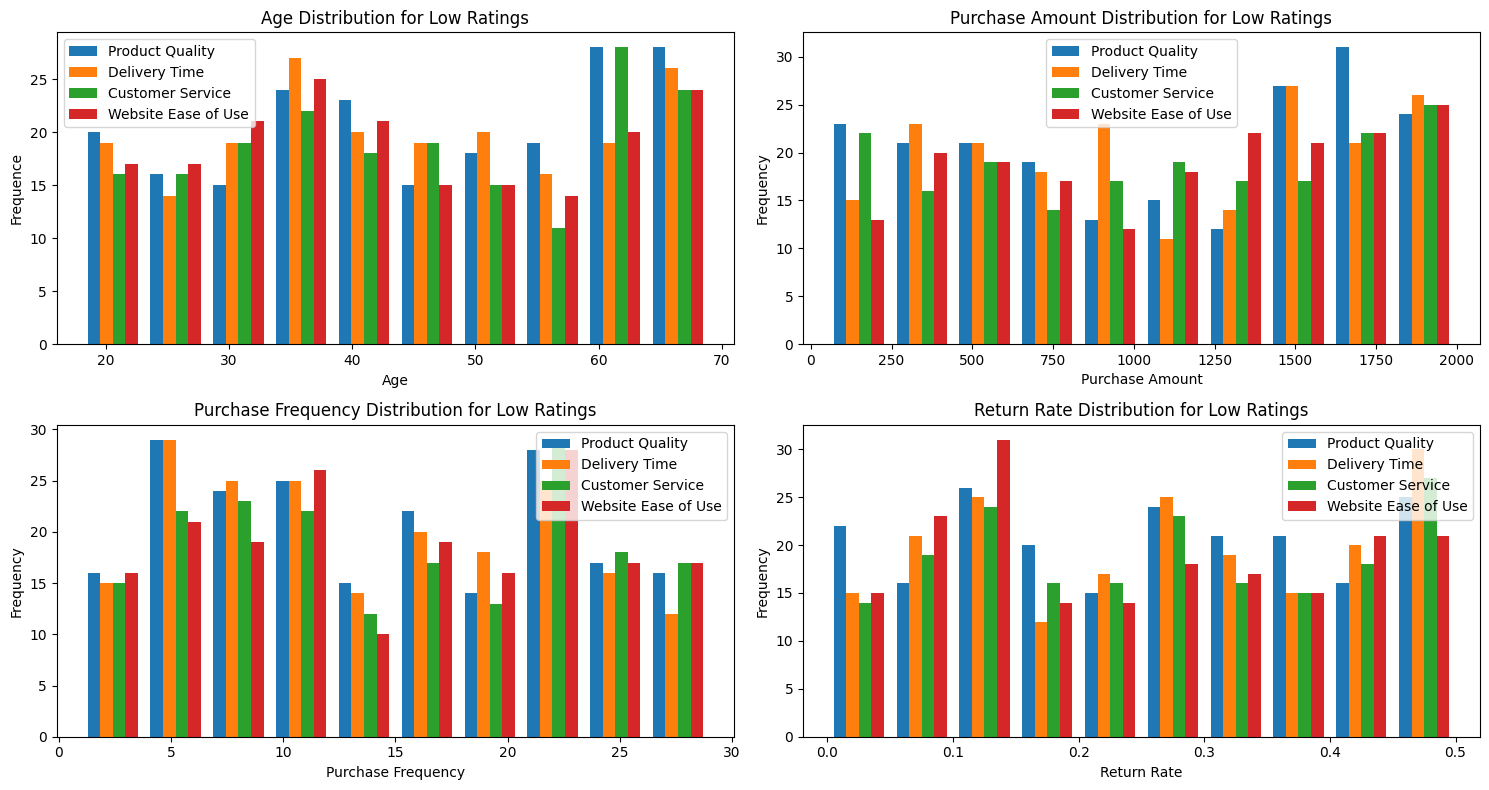

In [12]:
# Analyse des facteurs clés contribuant aux notes faibles dans differentes variables


# Seuil de faible evaluation
low_rating_threshold = 2

low_product_quality = df[df['ProductQualityRating'] <= low_rating_threshold]
low_delivery_time = df[df['DeliveryTimeRating'] <= low_rating_threshold]
low_customer_service = df[df['CustomerServiceRating'] <= low_rating_threshold]
low_website_ease_of_use = df[df['WebsiteEaseOfUseRating'] <= low_rating_threshold]

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.hist([low_product_quality['Age'], low_delivery_time['Age'], low_customer_service['Age'], low_website_ease_of_use['Age']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Age Distribution for Low Ratings')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist([low_product_quality['PurchaseAmount'], low_delivery_time['PurchaseAmount'], low_customer_service['PurchaseAmount'], low_website_ease_of_use['PurchaseAmount']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Amount Distribution for Low Ratings')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist([low_product_quality['PurchaseFrequency'], low_delivery_time['PurchaseFrequency'], low_customer_service['PurchaseFrequency'], low_website_ease_of_use['PurchaseFrequency']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Purchase Frequency Distribution for Low Ratings')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist([low_product_quality['ReturnRate'], low_delivery_time['ReturnRate'], low_customer_service['ReturnRate'], low_website_ease_of_use['ReturnRate']], bins=10, label=['Product Quality', 'Delivery Time', 'Customer Service', 'Website Ease of Use'])
plt.title('Return Rate Distribution for Low Ratings')
plt.xlabel('Return Rate')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')